In [7]:
import time

from matplotlib import pyplot as plt

# from mne_lsl.datasets import sample
from mne_lsl.lsl import local_clock

# from mne_lsl.player import PlayerLSL as Player
from mne_lsl.stream import StreamLSL as Stream

# fname = sample.data_path() / "sample-ant-raw.fif"
# player = Player(fname)
# player.start()
stream = Stream(bufsize=5, stype="EEG")  # 5 seconds of buffer
stream.connect(acquisition_delay=0.2)

RuntimeError: The provided arguments 'name', 'stype', and 'source_id' do not uniquely identify an LSL stream. 6 were found: [('PetalStream_telemetry', 'TELE', '115'), ('PetalStream_acceleration', 'ACCEL', '118'), ('PetalStream_eeg', 'EEG', '116'), ('PetalStream_connection_status', 'BinaryConnectionStatus', '120'), ('PetalStream_ppg', 'PPG', '117'), ('PetalStream_gyroscope', 'GYRO', '119')].

In [2]:
stream.pick(["Fz", "Cz", "Oz"])
stream.info

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,3 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1024.00 Hz
Highpass,0.00 Hz
Lowpass,512.00 Hz


In [3]:
print(f"Number of new samples: {stream.n_new_samples}")
data, ts = stream.get_data()
time.sleep(0.5)
print(f"Number of new samples: {stream.n_new_samples}")

Number of new samples: 92608
Number of new samples: 384


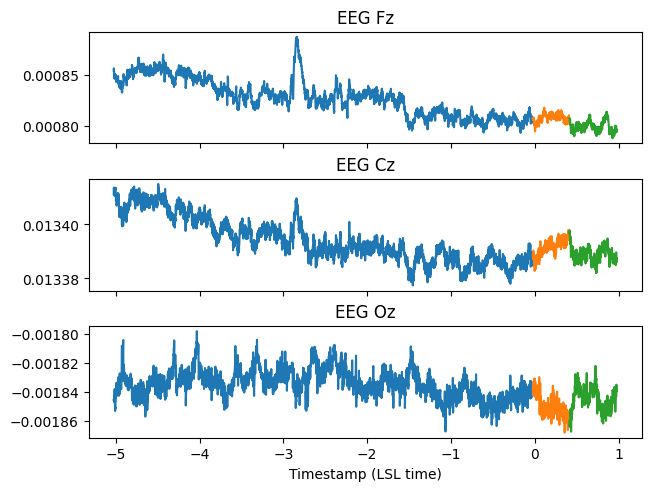

In [4]:
t0 = local_clock()
f, ax = plt.subplots(3, 1, sharex=True, constrained_layout=True)
for _ in range(3):
    # figure how many new samples are available, in seconds
    winsize = stream.n_new_samples / stream.info["sfreq"]
    # retrieve and plot data
    data, ts = stream.get_data(winsize)
    for k, data_channel in enumerate(data):
        ax[k].plot(ts - t0, data_channel)
    time.sleep(0.5)
for k, ch in enumerate(stream.ch_names):
    ax[k].set_title(f"EEG {ch}")
ax[-1].set_xlabel("Timestamp (LSL time)")
plt.show()

In [5]:
stream.disconnect()
player.stop()

2024-01-20 15:11:30.630 ( 113.635s) [R_MNE-LSL-Play  ]      data_receiver.cpp:342    ERR| Stream transmission broke off (Input stream error.); re-connecting...
